In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
# Load datasets
county_df = pd.read_csv('County-Hesitancy Estimates.csv')
state_df = pd.read_csv('State-Hesitancy Estimates.csv')



In [12]:
state_df

,State FIPS,State Name,"% Estimated Hesitant or Unsure - May 26 - June 7, 2021","% Estimated Hesitant - May 26 - June 7, 2021","% Estimated Strongly Hesitant - May 26 - June 7, 2021"
0,4,Arizona,22%,14%,11%
1,6,California,10%,6%,3%
2,12,Florida,18%,13%,8%
3,32,Nevada,19%,12%,6%
4,34,New Jersey,11%,5%,3%
5,36,New York,12%,6%,4%
6,41,Oregon,13%,10%,8%
7,48,Texas,16%,11%,7%


In [13]:
county_df

,FIPS Code,County Name,"% Estimated Hesitant or Unsure - May 26 - June 7, 2021","% Estimated Hesitant- May 26 - June 7, 2021","% Estimated Strongly Hesitant- May 26 - June 7, 2021"
0,1001,Autauga AL,22%,17%,13%
1,1003,Baldwin AL,20%,15%,12%
2,1005,Barbour AL,23%,17%,13%
3,1007,Bibb AL,25%,18%,14%
4,1009,Blount AL,24%,19%,14%
...,...,...,...,...,...
3138,56037,Sweetwater WY,28%,22%,16%
3139,56039,Teton WY,27%,21%,15%
3140,56041,Uinta WY,28%,22%,16%
3141,56043,Washakie WY,29%,23%,17%


In [14]:
# filter the County-dataset according to the 8 states

# Define target state abbreviations
target_state_abbr = ['AZ', 'CA', 'FL', 'NV', 'NJ', 'NY', 'OR', 'TX']

# Use string filtering to match counties ending in ", XX" where XX is the state abbreviation
filtered_county_df = county_df[
    county_df['County Name'].str.strip().str[-2:].isin(target_state_abbr)
]

# Display the filtered DataFrame
print(filtered_county_df.head())

# Optional: Save the result
filtered_county_df.to_csv('Filtered_County_Hesitancy_By_State.csv', index=False)

     FIPS Code  County Name  \
96        4001    Apache AZ   
97        4003   Cochise AZ   
98        4005  Coconino AZ   
99        4007      Gila AZ   
100       4009    Graham AZ   

    % Estimated Hesitant or Unsure - May 26 - June 7, 2021  \
96                                                 32%       
97                                                 22%       
98                                                 25%       
99                                                 24%       
100                                                24%       

    % Estimated Hesitant-  May 26 - June 7, 2021  \
96                                           21%   
97                                           14%   
98                                           16%   
99                                           16%   
100                                          16%   

    % Estimated Strongly Hesitant-  May 26 - June 7, 2021  
96                                                 16%     
97     

In [15]:
filtered_county_df

,FIPS Code,County Name,"% Estimated Hesitant or Unsure - May 26 - June 7, 2021","% Estimated Hesitant- May 26 - June 7, 2021","% Estimated Strongly Hesitant- May 26 - June 7, 2021"
96,4001,Apache AZ,32%,21%,16%
97,4003,Cochise AZ,22%,14%,11%
98,4005,Coconino AZ,25%,16%,12%
99,4007,Gila AZ,24%,16%,13%
100,4009,Graham AZ,24%,16%,13%
...,...,...,...,...,...
2772,48499,Wood TX,19%,13%,9%
2773,48501,Yoakum TX,18%,11%,8%
2774,48503,Young TX,19%,13%,9%
2775,48505,Zapata TX,19%,11%,7%


In [16]:
# Create a mapping of state abbreviations to full state names
state_abbr_to_name = {
    'AZ': 'Arizona',
    'CA': 'California',
    'FL': 'Florida',
    'NV': 'Nevada',
    'NJ': 'New Jersey',
    'NY': 'New York',
    'OR': 'Oregon',
    'TX': 'Texas'
}

# Extract the state abbreviation from the 'County Name' column
filtered_county_df['State Abbr'] = filtered_county_df['County Name'].str.strip().str[-2:]

# Map the abbreviation to the full state name
filtered_county_df['State Name'] = filtered_county_df['State Abbr'].map(state_abbr_to_name)

# Drop the temporary 'State Abbr' column if you don't need it
filtered_county_df.drop(columns=['State Abbr'], inplace=True)

# Display the result
print(filtered_county_df[['County Name', 'State Name']].head())

# Optional: Save the updated DataFrame
filtered_county_df.to_csv('Filtered_County_Hesitancy_With_State.csv', index=False)


     County Name State Name
96     Apache AZ    Arizona
97    Cochise AZ    Arizona
98   Coconino AZ    Arizona
99       Gila AZ    Arizona
100    Graham AZ    Arizona


<ipython-input-16-9c4e3e132f6b>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_county_df['State Abbr'] = filtered_county_df['County Name'].str.strip().str[-2:]
<ipython-input-16-9c4e3e132f6b>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_county_df['State Name'] = filtered_county_df['State Abbr'].map(state_abbr_to_name)
<ipython-input-16-9c4e3e132f6b>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: 

In [17]:
filtered_county_df

,FIPS Code,County Name,"% Estimated Hesitant or Unsure - May 26 - June 7, 2021","% Estimated Hesitant- May 26 - June 7, 2021","% Estimated Strongly Hesitant- May 26 - June 7, 2021",State Name
96,4001,Apache AZ,32%,21%,16%,Arizona
97,4003,Cochise AZ,22%,14%,11%,Arizona
98,4005,Coconino AZ,25%,16%,12%,Arizona
99,4007,Gila AZ,24%,16%,13%,Arizona
100,4009,Graham AZ,24%,16%,13%,Arizona
...,...,...,...,...,...,...
2772,48499,Wood TX,19%,13%,9%,Texas
2773,48501,Yoakum TX,18%,11%,8%,Texas
2774,48503,Young TX,19%,13%,9%,Texas
2775,48505,Zapata TX,19%,11%,7%,Texas


In [18]:
# Count of counties per state
county_counts = filtered_county_df['State Name'].value_counts().reset_index()

# Rename columns for clarity
county_counts.columns = ['State Name', 'County Count']

# Display the result
print(county_counts)


   State Name  County Count
0       Texas           254
1     Florida            67
2    New York            62
3  California            58
4      Oregon            36
5  New Jersey            21
6      Nevada            17
7     Arizona            15


In [21]:
# --- 1. Basic Info & Missing Values ---

def dataset_overview(df, name):
    print(f"\n{name} Dataset Info:")
    print(df.info())
    print("\nMissing Values:")
    print(df.isnull().sum())
    print("\nSummary Statistics:")
    print(df.describe(include='all'))

In [22]:
dataset_overview(county_df, "County-Level")


County-Level Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3143 entries, 0 to 3142
Data columns (total 5 columns):
 #   Column                                                  Non-Null Count  Dtype 
---  ------                                                  --------------  ----- 
 0   FIPS Code                                               3143 non-null   int64 
 1   County Name                                             3143 non-null   object
 2   % Estimated Hesitant or Unsure - May 26 - June 7, 2021  3143 non-null   object
 3   % Estimated Hesitant-  May 26 - June 7, 2021            3143 non-null   object
 4   % Estimated Strongly Hesitant-  May 26 - June 7, 2021   3143 non-null   object
dtypes: int64(1), object(4)
memory usage: 122.9+ KB
None

Missing Values:
FIPS Code                                                 0
County Name                                               0
% Estimated Hesitant or Unsure - May 26 - June 7, 2021    0
% Estimated Hesitant-  M

In [23]:
dataset_overview(state_df, "State-Level")


State-Level Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 5 columns):
 #   Column                                                  Non-Null Count  Dtype 
---  ------                                                  --------------  ----- 
 0   State FIPS                                              8 non-null      int64 
 1   State Name                                              8 non-null      object
 2   % Estimated Hesitant or Unsure - May 26 - June 7, 2021  8 non-null      object
 3   % Estimated Hesitant -  May 26 - June 7, 2021           8 non-null      object
 4   % Estimated Strongly Hesitant -  May 26 - June 7, 2021  8 non-null      object
dtypes: int64(1), object(4)
memory usage: 452.0+ bytes
None

Missing Values:
State FIPS                                                0
State Name                                                0
% Estimated Hesitant or Unsure - May 26 - June 7, 2021    0
% Estimated Hesitant -  May 

In [25]:
# Top 5 and Bottom 5 States - Estimated Hesitant
top5_hesitant = state_df[['State Name', '% Estimated Hesitant- May 26 - June 7, 2021']].sort_values(by='% Estimated Hesitant- May 26 - June 7, 2021', ascending=False).head(5)
bottom5_hesitant = state_df[['State Name', '% Estimated Hesitant- May 26 - June 7, 2021']].sort_values(by='% Estimated Hesitant- May 26 - June 7, 2021', ascending=True).head(5)

print("Top 5 States - Estimated Hesitant:")
print(top5_hesitant.to_string(index=False))

print("\n🔻 Bottom 5 States - Estimated Hesitant:")
print(bottom5_hesitant.to_string(index=False))


# Top 5 and Bottom 5 States - Estimated Strongly Hesitant
top5_strong = state_df[['State Name', '% Estimated Strongly Hesitant - May 26 - June 7, 2021']].sort_values(by='% Estimated Strongly Hesitant - May 26 - June 7, 2021', ascending=False).head(5)
bottom5_strong = state_df[['State Name', '% Estimated Strongly Hesitant - May 26 - June 7, 2021']].sort_values(by='% Estimated Strongly Hesitant - May 26 - June 7, 2021', ascending=True).head(5)

print("\n Top 5 States - Estimated Strongly Hesitant:")
print(top5_strong.to_string(index=False))

print("\n Bottom 5 States - Estimated Strongly Hesitant:")
print(bottom5_strong.to_string(index=False))



KeyError: "['% Estimated Hesitant- May 26 - June 7, 2021'] not in index"

In [26]:
# Correct column names
hesitant_col = '% Estimated Hesitant -  May 26 - June 7, 2021'
strongly_hesitant_col = '% Estimated Strongly Hesitant -  May 26 - June 7, 2021'

# Top 5 and Bottom 5 States - Estimated Hesitant
top5_hesitant = state_df[['State Name', hesitant_col]].sort_values(by=hesitant_col, ascending=False).head(5)
bottom5_hesitant = state_df[['State Name', hesitant_col]].sort_values(by=hesitant_col, ascending=True).head(5)

print("Top 5 States - Estimated Hesitant:")
print(top5_hesitant.to_string(index=False))

print("\n Bottom 5 States - Estimated Hesitant:")
print(bottom5_hesitant.to_string(index=False))

# Top 5 and Bottom 5 States - Estimated Strongly Hesitant
top5_strong = state_df[['State Name', strongly_hesitant_col]].sort_values(by=strongly_hesitant_col, ascending=False).head(5)
bottom5_strong = state_df[['State Name', strongly_hesitant_col]].sort_values(by=strongly_hesitant_col, ascending=True).head(5)

print("\n Top 5 States - Estimated Strongly Hesitant:")
print(top5_strong.to_string(index=False))

print("\n Bottom 5 States - Estimated Strongly Hesitant:")
print(bottom5_strong.to_string(index=False))


Top 5 States - Estimated Hesitant:
State Name % Estimated Hesitant -  May 26 - June 7, 2021
California                                            6%
  New York                                            6%
New Jersey                                            5%
   Arizona                                           14%
   Florida                                           13%

 Bottom 5 States - Estimated Hesitant:
State Name % Estimated Hesitant -  May 26 - June 7, 2021
    Oregon                                           10%
     Texas                                           11%
    Nevada                                           12%
   Florida                                           13%
   Arizona                                           14%

 Top 5 States - Estimated Strongly Hesitant:
State Name % Estimated Strongly Hesitant -  May 26 - June 7, 2021
   Florida                                                     8%
    Oregon                                                     

In [33]:
# Step 1: Clean column names
state_df.columns = state_df.columns.str.strip().str.replace(r'\s+', ' ', regex=True)

# Step 2: Rename columns for simplicity
state_df.rename(columns={
    '% Estimated Hesitant or Unsure - May 26 - June 7, 2021': 'Estimated_Hesitant_or_Unsure',
    '% Estimated Hesitant - May 26 - June 7, 2021': 'Estimated_Hesitant',
    '% Estimated Strongly Hesitant - May 26 - June 7, 2021': 'Estimated_Strongly_Hesitant',
    'State Name': 'State'
}, inplace=True)

# Step 3: Convert percentage columns to float
# Convert percentage columns safely from string to float (after removing %)
for col in ['Estimated_Hesitant_or_Unsure', 'Estimated_Hesitant', 'Estimated_Strongly_Hesitant']:
    state_df[col] = state_df[col].astype(str).str.replace('%', '').astype(float)

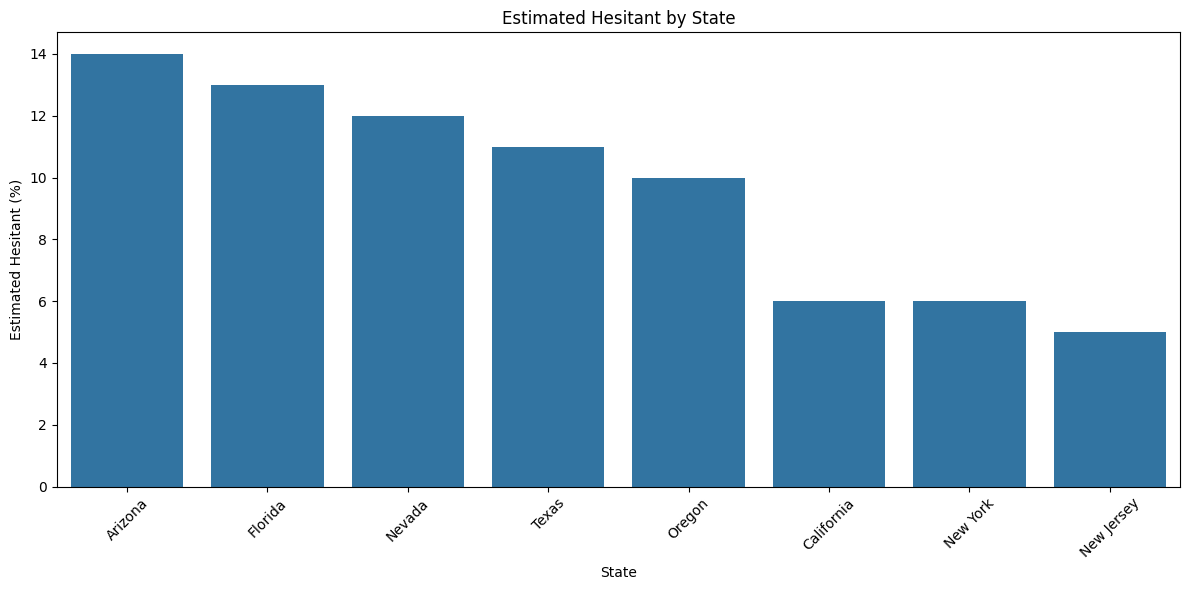

In [34]:
# Step 4: Plot - Estimated Hesitant by State
plt.figure(figsize=(12, 6))
sns.barplot(data=state_df.sort_values(by='Estimated_Hesitant', ascending=False),
            x='State', y='Estimated_Hesitant')
plt.xticks(rotation=45)
plt.title("Estimated Hesitant by State")
plt.xlabel("State")
plt.ylabel("Estimated Hesitant (%)")
plt.tight_layout()
plt.show()

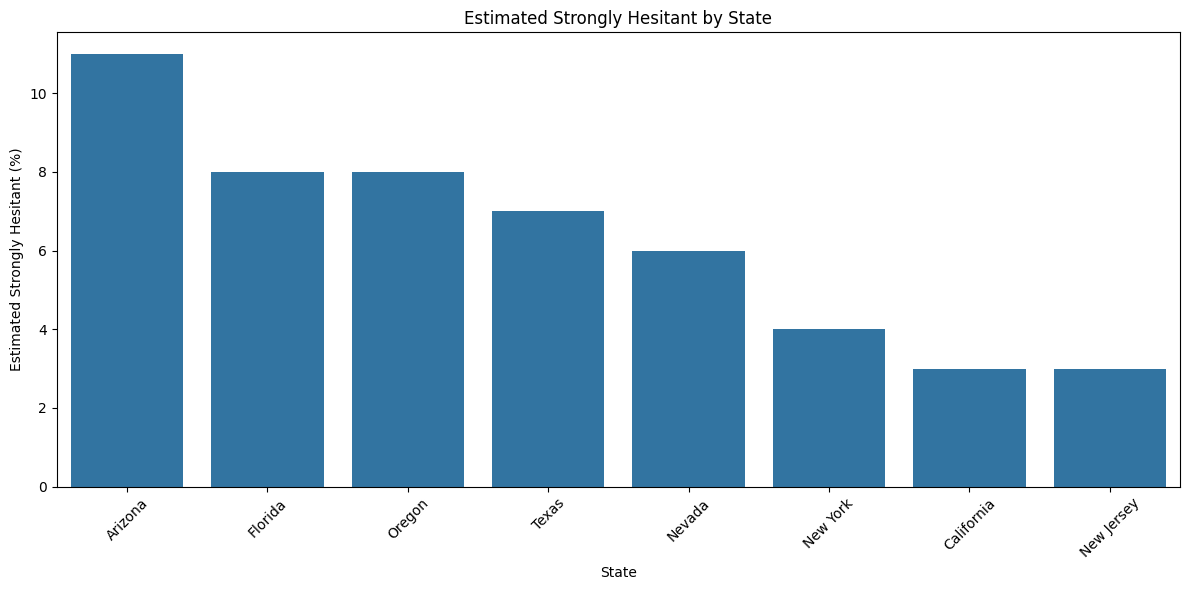

In [35]:
# Step 5: Plot - Estimated Strongly Hesitant by State
plt.figure(figsize=(12, 6))
sns.barplot(data=state_df.sort_values(by='Estimated_Strongly_Hesitant', ascending=False),
            x='State', y='Estimated_Strongly_Hesitant')
plt.xticks(rotation=45)
plt.title("Estimated Strongly Hesitant by State")
plt.xlabel("State")
plt.ylabel("Estimated Strongly Hesitant (%)")
plt.tight_layout()
plt.show()

In [39]:
# Rename hesitancy columns for easier access
filtered_county_df.rename(columns={
    '% Estimated Hesitant or Unsure - May 26 - June 7, 2021': 'Estimated_Hesitant_or_Unsure',
    '% Estimated Hesitant-  May 26 - June 7, 2021': 'Estimated_Hesitant',
    '% Estimated Strongly Hesitant-  May 26 - June 7, 2021': 'Estimated_Strongly_Hesitant'
}, inplace=True)

# Convert percentage strings to float
for col in ['Estimated_Hesitant_or_Unsure', 'Estimated_Hesitant', 'Estimated_Strongly_Hesitant']:
    filtered_county_df[col] = filtered_county_df[col].astype(str).str.replace('%', '').astype(float)

<ipython-input-39-18fbb98c13c4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_county_df.rename(columns={
<ipython-input-39-18fbb98c13c4>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_county_df[col] = filtered_county_df[col].astype(str).str.replace('%', '').astype(float)
<ipython-input-39-18fbb98c13c4>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_

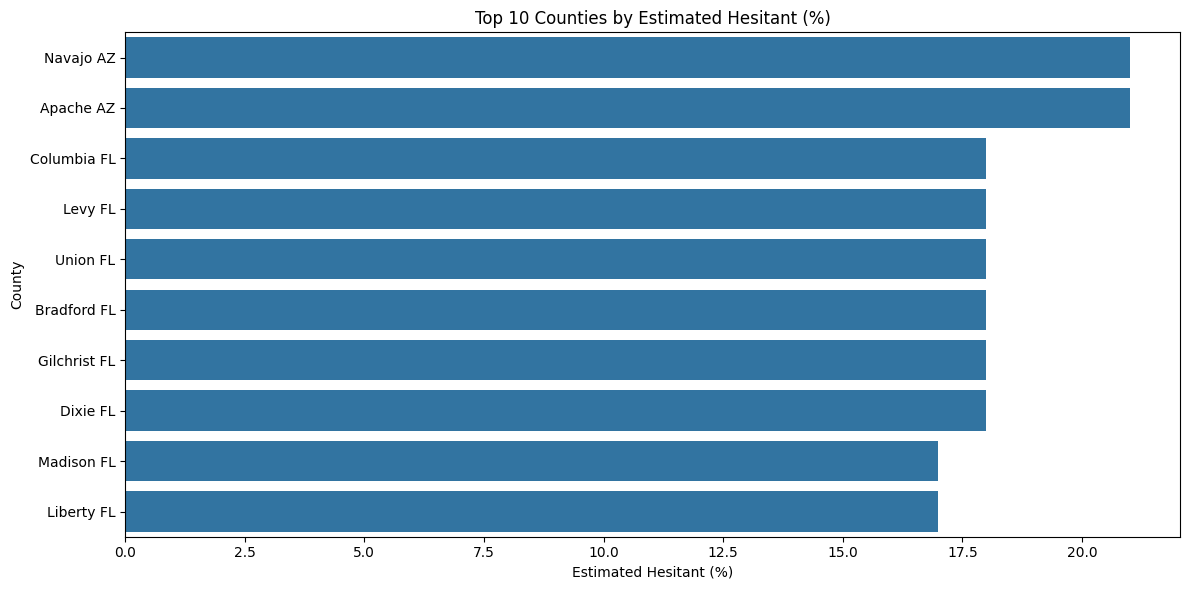

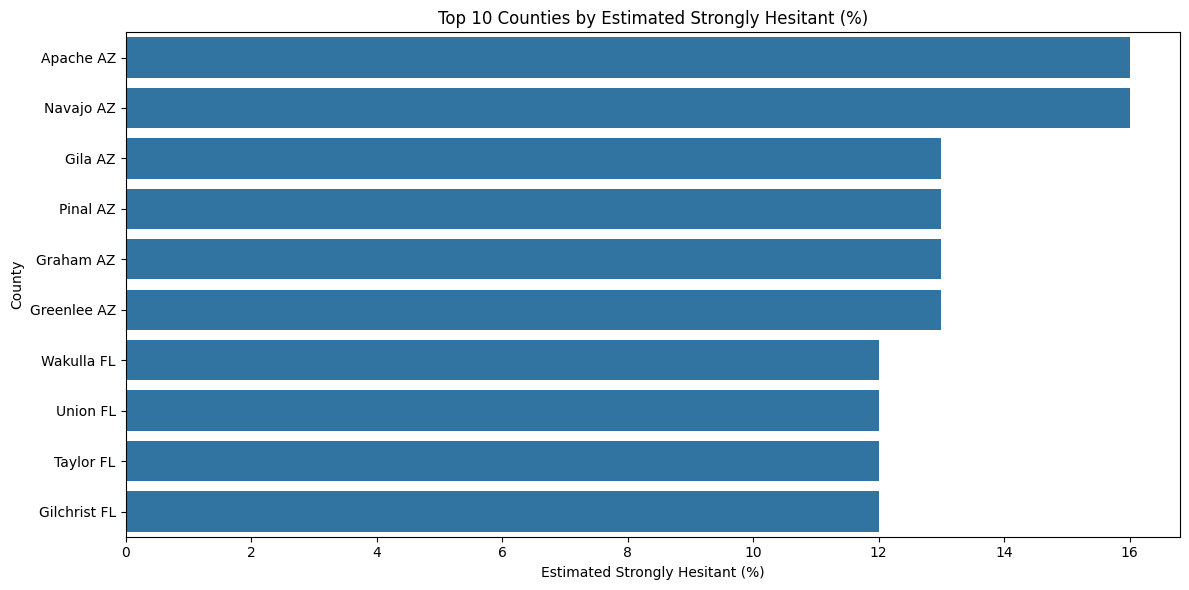

In [40]:
# Plot: Top 10 Counties by Estimated Hesitant
top_hesitant = filtered_county_df.sort_values(by='Estimated_Hesitant', ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(data=top_hesitant, x='Estimated_Hesitant', y='County Name')
plt.title("Top 10 Counties by Estimated Hesitant (%)")
plt.xlabel("Estimated Hesitant (%)")
plt.ylabel("County")
plt.tight_layout()
plt.show()

# Plot: Top 10 Counties by Estimated Strongly Hesitant
top_strongly_hesitant = filtered_county_df.sort_values(by='Estimated_Strongly_Hesitant', ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(data=top_strongly_hesitant, x='Estimated_Strongly_Hesitant', y='County Name')
plt.title("Top 10 Counties by Estimated Strongly Hesitant (%)")
plt.xlabel("Estimated Strongly Hesitant (%)")
plt.ylabel("County")
plt.tight_layout()
plt.show()

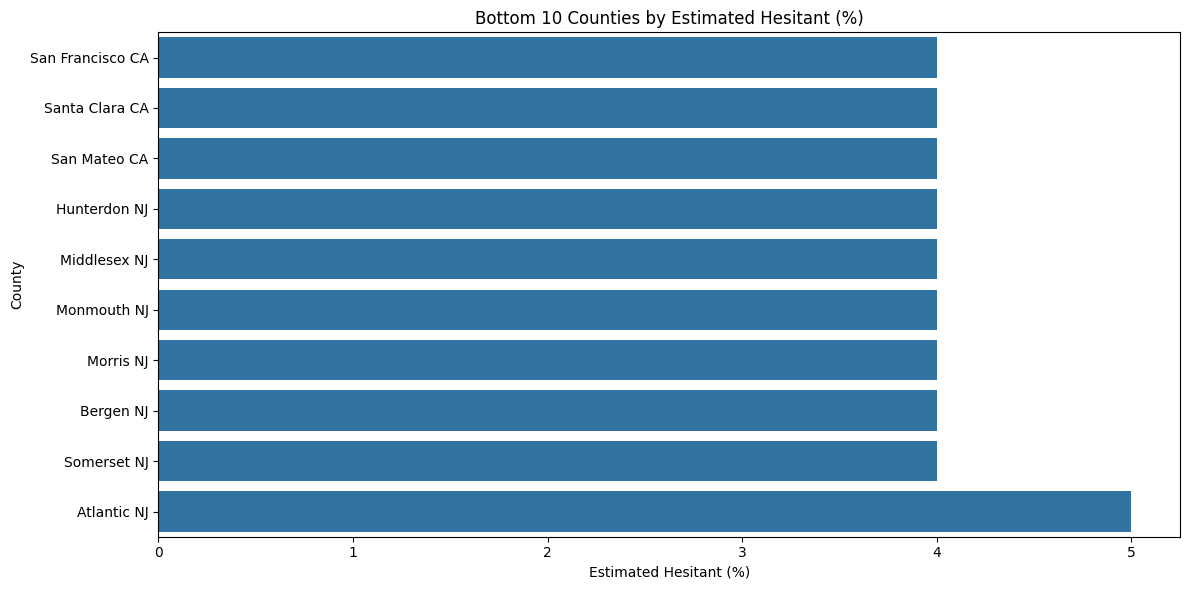

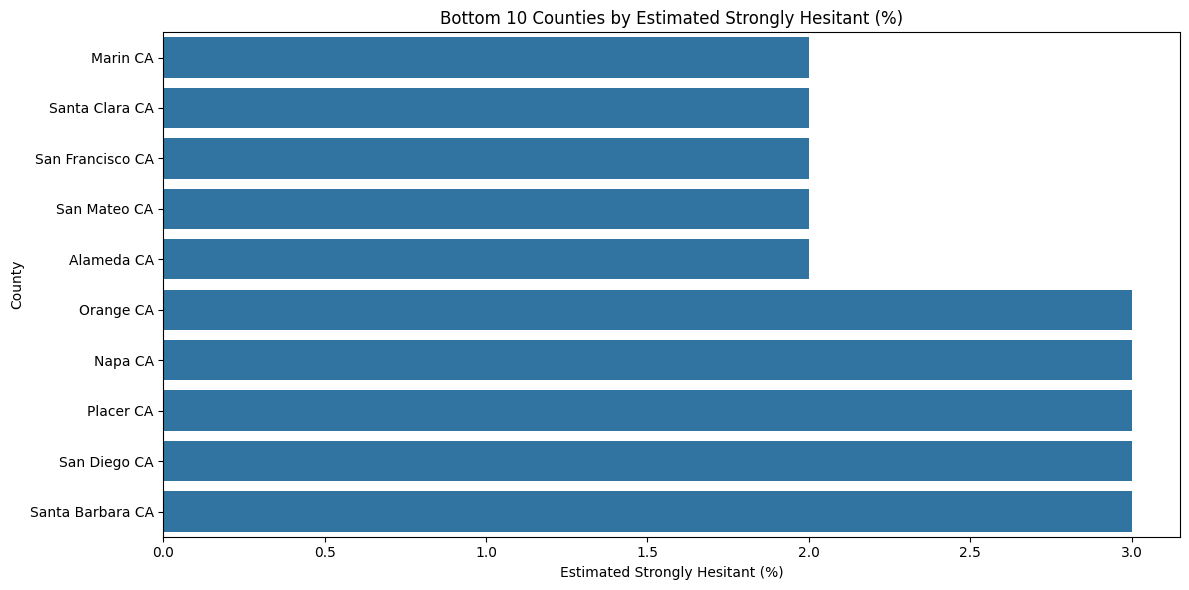

In [43]:
# Plot: Bottom 10 Counties by Estimated Hesitant
bottom_hesitant = filtered_county_df.sort_values(by='Estimated_Hesitant', ascending=True).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(data=bottom_hesitant, x='Estimated_Hesitant', y='County Name')
plt.title("Bottom 10 Counties by Estimated Hesitant (%)")
plt.xlabel("Estimated Hesitant (%)")
plt.ylabel("County")
plt.tight_layout()
plt.show()

# Plot: Bottom 10 Counties by Estimated Strongly Hesitant
bottom_strongly_hesitant = filtered_county_df.sort_values(by='Estimated_Strongly_Hesitant', ascending=True).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(data=bottom_strongly_hesitant, x='Estimated_Strongly_Hesitant', y='County Name')
plt.title("Bottom 10 Counties by Estimated Strongly Hesitant (%)")
plt.xlabel("Estimated Strongly Hesitant (%)")
plt.ylabel("County")
plt.tight_layout()
plt.show()


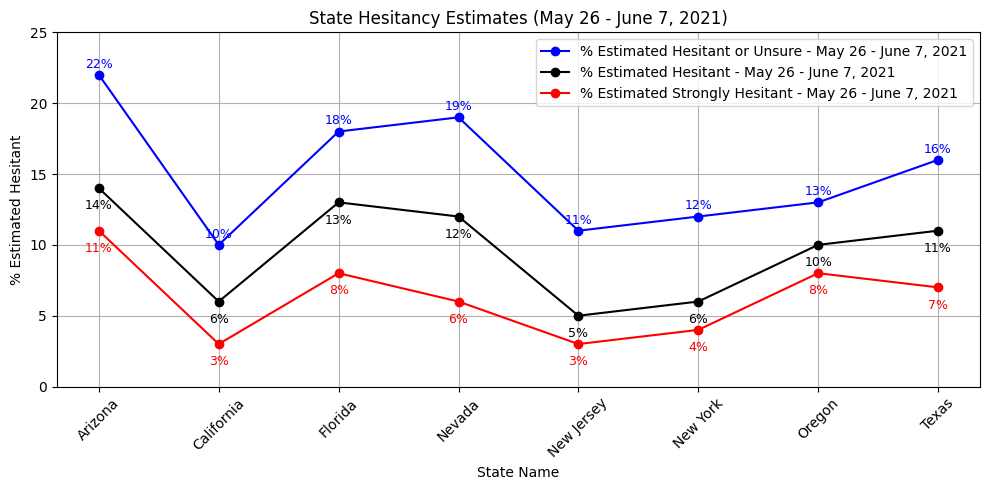

In [48]:
# Convert percentage strings to floats
for col in ['Estimated_Hesitant_or_Unsure', 'Estimated_Hesitant', 'Estimated_Strongly_Hesitant']:
    state_df[col] = state_df[col].astype(str).str.replace('%', '').astype(float)

# Create the plot
plt.figure(figsize=(10, 5))

# Plot each line with markers and specified colors
plt.plot(state_df['State'], state_df['Estimated_Hesitant_or_Unsure'], marker='o',
         label='% Estimated Hesitant or Unsure - May 26 - June 7, 2021', color='blue')

plt.plot(state_df['State'], state_df['Estimated_Hesitant'], marker='o',
         label='% Estimated Hesitant - May 26 - June 7, 2021', color='black')

plt.plot(state_df['State'], state_df['Estimated_Strongly_Hesitant'], marker='o',
         label='% Estimated Strongly Hesitant - May 26 - June 7, 2021', color='red')

# Add data labels to each point
for i, state in enumerate(state_df['State']):
    plt.text(state, state_df['Estimated_Hesitant_or_Unsure'][i] + 0.5,
             f"{state_df['Estimated_Hesitant_or_Unsure'][i]:.0f}%", ha='center', fontsize=9, color='blue')

    plt.text(state, state_df['Estimated_Hesitant'][i] - 1.5,
             f"{state_df['Estimated_Hesitant'][i]:.0f}%", ha='center', fontsize=9, color='black')

    plt.text(state, state_df['Estimated_Strongly_Hesitant'][i] - 1.5,
             f"{state_df['Estimated_Strongly_Hesitant'][i]:.0f}%", ha='center', fontsize=9, color='red')

# Final styling
plt.title("State Hesitancy Estimates (May 26 - June 7, 2021)")
plt.xlabel("State Name")
plt.ylabel("% Estimated Hesitant")
plt.xticks(rotation=45)
plt.ylim(0, 25)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()